# Apartment Information

In [35]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import csv
import pandas as pd
import time

PATH = Service("Downloads:/chromedriver_mac_arm64/chromedriver.exe")
driver = webdriver.Chrome(service=PATH)

driver.get('https://offcampushousing.binghamton.edu/city/vestal-ny/listing/20-hawley-street-28935')

space = driver.find_element(By.XPATH, './/*[@id="__BVID__52___BV_tab_button__"]')
space.send_keys(Keys.SPACE)
x = 0
while x < 5:
    space.send_keys(Keys.UP)
    x += 1

time.sleep(10)

# https://anaasher.medium.com/web-scraping-how-to-use-python-selenium-to-extract-data-from-html-table-7e6e3bcaebd6
df = pd.read_html(driver.find_element(By.XPATH, './html/body/div[1]/main/div/div[2]/div[1]/div[3]/div/div[1]/div[2]/div[2]/div[1]/div/table').get_attribute('outerHTML'))[0]

driver.quit()

df = df.drop(columns = ['NAME', 'BATH', 'AVAILABLE'])

df.loc[[4], 'RENT'] = '$1045-1059'

df['SQ FT'] = df['SQ FT'].fillna('Not Specified')

df.to_csv('20hawley_apartments.csv')

df

,BED,RENT,SQ FT
0,Studio,$1345,295.0
1,Studio,$1385,335.0
2,1,$1435,394.0
3,2,$1149,Not Specified
4,3,$1045-1059,Not Specified
5,4,$999,1370.0
6,5,$999,1798.0
7,6,$1029,1998.0


# Utilities and Amenities

In [6]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import csv
import pandas as pd
import time

PATH = Service("Downloads:/chromedriver_mac_arm64/chromedriver.exe")
driver = webdriver.Chrome(service=PATH)

driver.get('https://offcampushousing.binghamton.edu/city/vestal-ny/listing/20-hawley-street-28935')

time.sleep(5)

space = driver.find_element(By.XPATH, './/*[@id="__BVID__52___BV_tab_button__"]')
space.send_keys(Keys.SPACE)

utilities = driver.find_element(By.XPATH, './/*[@id="accordion"]/div[2]/h2')
utilities.send_keys(Keys.SPACE)

utilities_file = open('20hawley_utilities.csv', 'w', newline='', encoding='utf-8')
utilities_writer = csv.writer(utilities_file)
utilities_writer.writerow(['Utilities Included in Rent'])

time.sleep(5)

for item in driver.find_elements(By.XPATH, './/*[@id="collapse-2"]/ul/li'):
    utilities_writer.writerow([item.text])
    
utilities_file.close()

amenities = driver.find_element(By.XPATH, './/*[@id="accordion"]/div[3]/h2')
amenities.send_keys(Keys.SPACE)

amenities_file = open('20hawley_amenities.csv', 'w', newline='', encoding='utf-8')
amenities_writer = csv.writer(amenities_file)
amenities_writer.writerow(['Amenities'])

for item in driver.find_elements(By.XPATH, './/*[@id="collapse-3"]/ul/li'):
    amenities_writer.writerow([item.text])

amenities_file.close()

driver.quit()

# Commute Information

In [7]:
# csv for commute times by mode of transport and time, only 3 rows so easier to do manually
import csv
import pandas as pd

commute_file = open('20hawley_commute.csv', 'w', newline='', encoding='utf-8')
commute_writer = csv.writer(commute_file)
commute_writer.writerow(['Type of Transport', 'Time to Reach Campus (minutes)'])

commute_writer.writerow(['Walk', '74'])
commute_writer.writerow(['Bicycle', '20'])
commute_writer.writerow(['Bus/Car', '10'])

commute_file.close()

pd.read_csv('20hawley_commute.csv')

,Type of Transport,Time to Reach Campus (minutes)
0,Walk,74
1,Bicycle,20
2,Bus/Car,10


# Reviews

In [7]:
import pandas as pd

reviews = pd.read_csv('20hawley_reviews.csv')
reviews

,date,rating,review_text,reviewer
0,6 months ago,5/5,First year here at Hawley and I am so far lovi...,Eamon Dillon
1,3 months ago,5/5,20Hawley is one of the best places to live in ...,Brianna Pappas
2,6 months ago,5/5,"It’s a modern, exquisite looking building with...",Matthew Glick
3,6 months ago,5/5,Not only is it located in the most convenient ...,Ryan Reilly
4,6 months ago,5/5,One of the best apartments i have been around ...,Danny Snow
...,...,...,...,...
194,5 years ago,5/5,No text found,C. F.
195,3 years ago,5/5,No text found,Hannah Kemplay
196,4 years ago,5/5,No text found,Siddharth Mahendran
197,5 years ago,3/5,No text found,Miraç C.


<AxesSubplot:>

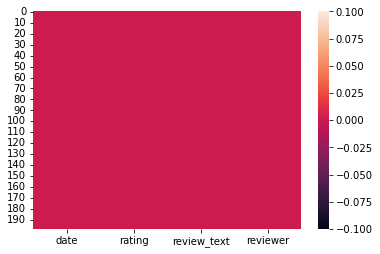

In [4]:
import seaborn as sns

cols = reviews.columns #creating a list of columns
sns.heatmap(reviews[cols].isnull()) #checking for null values 

In [8]:
reviews.rating = reviews.rating.str[0:1]
reviews

,date,rating,review_text,reviewer
0,6 months ago,5,First year here at Hawley and I am so far lovi...,Eamon Dillon
1,3 months ago,5,20Hawley is one of the best places to live in ...,Brianna Pappas
2,6 months ago,5,"It’s a modern, exquisite looking building with...",Matthew Glick
3,6 months ago,5,Not only is it located in the most convenient ...,Ryan Reilly
4,6 months ago,5,One of the best apartments i have been around ...,Danny Snow
...,...,...,...,...
194,5 years ago,5,No text found,C. F.
195,3 years ago,5,No text found,Hannah Kemplay
196,4 years ago,5,No text found,Siddharth Mahendran
197,5 years ago,3,No text found,Miraç C.


In [13]:
import statistics

rating = reviews['rating'].astype(int)
average = statistics.mean(rating)

average = round(average, 2) # rounding average to 2 decimals to keep it consistent with the other review averages

average

4.66